# #7DaysOfCode - Machine Learning


####  In this #7DaysOfCode, my goal will be to analyze Spotify data and apply Machine Learning techniques to predict song popularity. 

* In addition, I will also be able to use my data manipulation, visualization, and analysis skills using the Python language.
* Machine Learning is a technique that allows an algorithm to “learn” to perform a specific task from data. This means that, instead of programming specific rules for each situation, we can teach a model to recognize patterns in the data and make decisions based on those patterns.

## Import libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
from numpy import random

# Improve visualization
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

# Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

# Evaluation metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Data resampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Other libraries
import os
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Warning message
warnings.filterwarnings("ignore")


## Load dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/letpires/7DaysOfCodeSpotifyML/main/dataset.csv', index_col=0)

In [173]:
# Visualize the first five rows
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [174]:
print("The database contains {} columns and {} rows.".format(df.shape[1], df.shape[0]))

The database contains 20 columns and 114000 rows.


## Exploratory Data Analysis (EDA)

### Profiling Report

In [175]:
#profile = ProfileReport(df)

In [176]:
#profile

In [177]:
# Exporting the report to HTML
#profile.to_file('my_report.html')

In [178]:
# Informations about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

##### With the generated report, it is possible to see that three columns each have one missing value. It is important to investigate the specific missing data further to determine the best way to handle it.

## Data Preprocessing

### Dealing with Missing Data

In [3]:
# Check and view rows with null values
missing_values = df[df.isnull().any(axis=1)]
missing_values

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [4]:
# Drop the rows with null values
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

### Dealing with Duplicate Values

In [6]:
# Duplicate values
duplicates = df[df.duplicated(keep=False)]
print(f"Duplicate rows {duplicates}")

Duplicate rows                       track_id                 artists  \
1874    0CDucx9lKxuCZplLXUz0iX  Buena Onda Reggae Club   
1925    0CDucx9lKxuCZplLXUz0iX  Buena Onda Reggae Club   
2109    2aibwv5hGXSgw7Yru8IYTO   Red Hot Chili Peppers   
2155    2aibwv5hGXSgw7Yru8IYTO   Red Hot Chili Peppers   
3683    7mULVp0DJrI2Nd6GesLvxn            Joy Division   
...                        ...                     ...   
111980  46FPub2Fewe7XrgM0smTYI               Morcheeba   
112931  6qVA1MqDrDKfk9144bhoKp             Acil Servis   
112968  6qVA1MqDrDKfk9144bhoKp             Acil Servis   
113295  5WaioelSGekDk3UNQy8zaw             Matt Redman   
113345  5WaioelSGekDk3UNQy8zaw             Matt Redman   

                                              album_name  \
1874                                             Disco 2   
1925                                             Disco 2   
2109                                    Stadium Arcadium   
2155                                    Stadium 

In [7]:
# Number of duplicate rows
num_duplicate = df.duplicated().sum()
print(f"Count of duplicate rows: {num_duplicate}")

Count of duplicate rows: 450


In [8]:
# Drop duplicate values
df.drop_duplicates(keep='first', inplace=True)

In [9]:
num_duplicates_after = df.duplicated().sum()
print(f"Count of duplicate rows: {num_duplicates_after}")

Count of duplicate rows: 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

## Answering some questions

In [187]:
# Top 100 popular songs
popular_songs = df.sort_values('popularity', ascending=False).head(100)
popular_songs

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latino
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81803,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,pop
51259,38T0tPVZHcPZyhtOcCP7pF,Lil Nas X,STAR WALKIN' (League of Legends Worlds Anthem),STAR WALKIN' (League of Legends Worlds Anthem),90,210575,True,0.637,0.715,2,-4.971,0,0.0455,0.14800,0.000000,0.0892,0.308,141.872,4,hip-hop
23002,4zN21mbAuaD0WqtmaTZZeP,James Hype;Miggy Dela Rosa,Ferrari,Ferrari,90,186661,False,0.847,0.690,1,-7.877,0,0.0493,0.01270,0.000060,0.0526,0.692,125.004,4,deep-house
51352,1PckUlxKqWQs3RlWXVBLw3,Lizzo,About Damn Time,About Damn Time,89,191822,True,0.836,0.743,10,-6.305,0,0.0656,0.09950,0.000000,0.3350,0.722,108.966,4,hip-hop


In [188]:
# Most popular artists
popular_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
popular_artists

artists
Sam Smith;Kim Petras          100.0
Bizarrap;Quevedo               99.0
Manuel Turizo                  98.0
Bad Bunny;Chencho Corleone     97.0
Bad Bunny;Bomba Estéreo        94.5
Joji                           94.0
Beyoncé                        93.0
Harry Styles                   92.0
Rema;Selena Gomez              92.0
Drake;21 Savage                91.0
Name: popularity, dtype: float64

In [189]:
# Most popular genre
popular_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)
popular_genre

track_genre
pop-film     59.280280
k-pop        56.963928
chill        53.704705
sad          52.379000
grunge       49.582583
indian       49.528529
anime        48.766767
emo          48.128000
pop          47.903323
sertanejo    47.866000
Name: popularity, dtype: float64

In [190]:
#  Top 5 danceable songs
top_5_songs = df[['track_name','artists', 'danceability']].sort_values(by='danceability', ascending=False).head(5)
top_5_songs

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


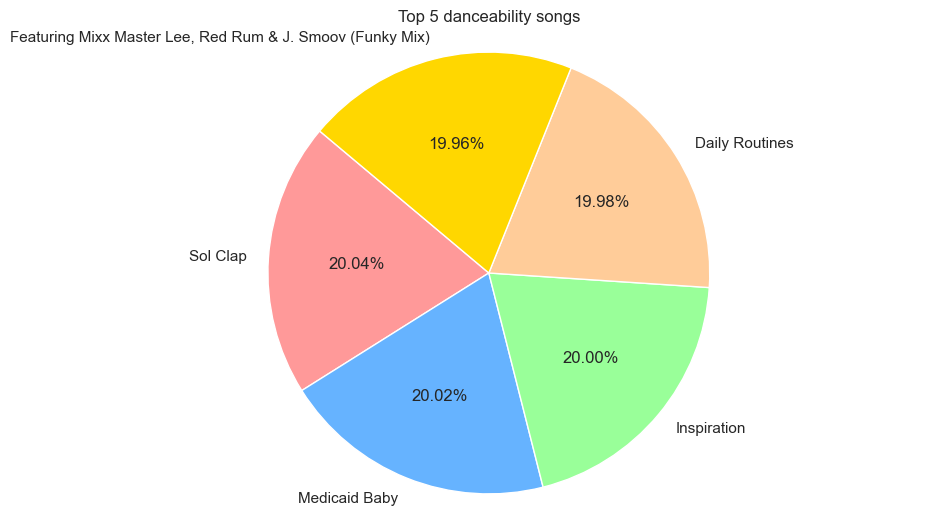

In [191]:
# Graphic visualization Most danceability songs

sizes = top_5_songs['danceability']
labels = top_5_songs['track_name']

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Top 5 danceability songs')

plt.show()

## Data Transformation

In [11]:
# Class creation for popularity

""" We will create a new column with popularity datas.
    Where 1 is for popularity and 0 for non popular"""

# Define the class

df[df['popularity']>=80]

# Create list for condition and choice
condition = [
    (df['popularity']>=80),
    (df['popularity']<80)
]

choicelist = [1,0]

# New column with new values for popularity
df['pop_class'] = np.select(condition, choicelist, default='Not Specified')
df['pop_class'] = df['pop_class'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

In [13]:
# Drop popularity column
df.drop(columns=['popularity'], inplace=True)

In [14]:
# For Machine Learning calculations, we only need the quantitative columns

# Create an empty column
col_to_drop = []

# Loop for
for column in df:
    if df[column].dtype == 'object':
        col_to_drop.append(column)

df_quantitative = df.drop(columns=col_to_drop)

print("The database contains {} columns and {} rows.".format(df_quantitative.shape[1], df_quantitative.shape[0]))

The database contains 15 columns and 113549 rows.


In [15]:
# Drop explicit column

df_quantitative.drop(columns=['explicit'], inplace=True)

In [16]:
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113549 non-null  int64  
 1   danceability      113549 non-null  float64
 2   energy            113549 non-null  float64
 3   key               113549 non-null  int64  
 4   loudness          113549 non-null  float64
 5   mode              113549 non-null  int64  
 6   speechiness       113549 non-null  float64
 7   acousticness      113549 non-null  float64
 8   instrumentalness  113549 non-null  float64
 9   liveness          113549 non-null  float64
 10  valence           113549 non-null  float64
 11  tempo             113549 non-null  float64
 12  time_signature    113549 non-null  int64  
 13  pop_class         113549 non-null  int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 12.6 MB


## Data Normalization

<Axes: >

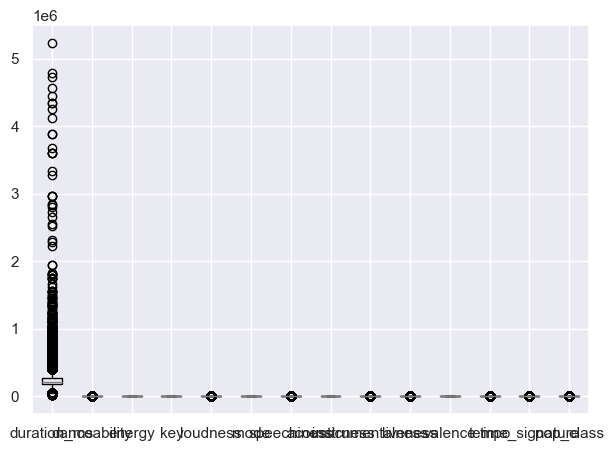

In [197]:
# Unnormalized df
df_quantitative.boxplot()

In [198]:
df_quantitative.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'pop_class'],
      dtype='object')

In [17]:
# Manual Normalization
df_quantitative_nm = (df_quantitative - df_quantitative.min()) / (df_quantitative.max() - df_quantitative.min())
df_quantitative_nm.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_class
0,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


<Axes: >

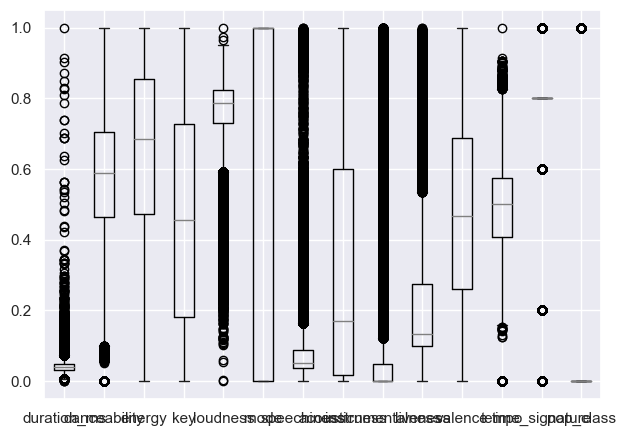

In [18]:
# Normalized df
df_quantitative_nm.boxplot()

## Splitting the model

We split the data to analyze the performance of our model in a fair way. This technique is used to guarantee the model won't overfit. In summary, the training data is used to train the model, while the test data is used to evaluate the model's performance on data it has never seen before. The validation data is used to fine-tune the model's hyperparameters (parameters that improve the model's performance).

In [201]:
df_quantitative_nm.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'pop_class'],
      dtype='object')

In [19]:
# Splitting the data for train and validation
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.2, random_state=42, shuffle=True)

In [20]:
# Visualizing variable proportions
df_train.pop_class.value_counts(normalize=True)

pop_class
0.0    0.98941
1.0    0.01059
Name: proportion, dtype: float64

In [21]:
# Visualizing variable proportions
df_test.pop_class.value_counts(normalize=True)

pop_class
0.0    0.989564
1.0    0.010436
Name: proportion, dtype: float64

In [22]:
# Dividing X and y
X = df_train.drop('pop_class', axis=1)
y = df_train.pop_class

# Data Division keeping sample percentage
StratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**StratifiedKFold** is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. [https://scikit-learn.org/stable/modules/cross_validation.html]

In [206]:
X.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000,90839.000000
mean,0.041988,0.575899,0.642366,0.482775,0.763694,0.637149,0.088038,0.314938,0.155720,0.213835,0.476308,0.502021,0.780980
std,0.020364,0.176021,0.250962,0.323799,0.092578,0.480825,0.110068,0.333138,0.309283,0.190852,0.260495,0.123249,0.086178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031645,0.463959,0.473000,0.181818,0.731323,0.000000,0.037306,0.016767,0.000000,0.097900,0.261307,0.408083,0.800000
50%,0.039098,0.588832,0.685000,0.454545,0.786730,1.000000,0.050777,0.168675,0.000041,0.132000,0.465327,0.501364,0.800000
75%,0.048438,0.705584,0.854000,0.727273,0.823613,1.000000,0.087876,0.597390,0.048800,0.274000,0.686432,0.575567,0.800000
max,1.000000,0.998985,1.000000,1.000000,0.963783,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.914670,1.000000


In [207]:
y.describe()

count    90839.000000
mean         0.010590
std          0.102363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pop_class, dtype: float64

In [30]:
# # Looping to separate datas in train and test
for train_index, val_index in StratifiedKFold.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [31]:
# # Checking the proportions of class 1 in the division
print(f"Dimentions: {X_train.shape, X_val.shape, y_train.shape, y_val.shape} \n")
print(f"Proportion of df_train for class = 1: {round(len(df_train[df_train.pop_class==1]) / df_train.shape[0], 4)}\n")
print(f"Proportion of X_train for class=1: {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}\n")
print(f"Proportion of X_val for class=1: {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}\n")

Dimentions: ((72672, 13), (18167, 13), (72672,), (18167,)) 

Proportion of df_train for class = 1: 0.0106

Proportion of X_train for class=1: 0.0106

Proportion of X_val for class=1: 0.0106



Both sets have the same proportion in the response variable. From now on, we will work only with the training and test datasets for final validation.

## Defining the baseline

A baseline is the result of a very basic model/solution. You typically create a baseline and then attempt more complex solutions to achieve a better result. If you can score better than the baseline, that's a good sign.

First, I split the data into training and validation sets, and then I used StratifiedKFold, which splits the data for cross-validation while preserving the percentage of samples in each class.

In [32]:
# Instantiating the model
logReg = LogisticRegression()

# Training the model
logReg.fit(X_train, y_train)

# Prediction train
y_pred_base_train = logReg.predict(X_train)

# Prediction validation
y_pred_base_val = logReg.predict(X_val)

In [33]:
# Convert the coeficients into a Python list
logReg.coef_.tolist()[0]

[-1.1656257011602673,
 2.177853847683026,
 -1.4509371669169657,
 0.03178521895961475,
 4.669393484759679,
 -0.07821555870277869,
 -0.3895659163943425,
 -1.764931094681648,
 -2.6650941554873597,
 -1.5591831614791476,
 -0.43473944016083127,
 -0.7057343475265041,
 -1.0058377606393227]

**.tolist()** converts the Numpy array that contains the coeficients into a Python list.

In [34]:
df_coef = df_quantitative_nm.drop(columns='pop_class')
df_coef.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [35]:
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}

df_ML = pd.DataFrame(data)
df_ML

,Features,Coef
0,duration_ms,-1.165626
1,danceability,2.177854
2,energy,-1.450937
3,key,0.031785
4,loudness,4.669393
5,mode,-0.078216
6,speechiness,-0.389566
7,acousticness,-1.764931
8,instrumentalness,-2.665094
9,liveness,-1.559183


## Validating the baseline

In [36]:
print('In the TRAINING data:')

print('---' * 20)
print('Model:    Logistic Regression (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('In the VALIDATION data:')
print('---' * 20)
print('Model:    Logistic Regression (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)
     

In the TRAINING data:
------------------------------------------------------------
Model:    Logistic Regression (baseline)

accuracy:  0.9894044473800088
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

In the VALIDATION data:
------------------------------------------------------------
Model:    Logistic Regression (baseline)

accuracy:  0.9894313865800628
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------


## Resampling, testing and validation

In [37]:
# Dictionary of classifiers 
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

## Distribution (Random UnderSampling)

For this undersampling, we will use one of the NearMiss methods from the imbalanced-learn (imblearn) library, which selects samples based on the distance between the majority class and the minority class samples, essentially using the KNN model in its framework.

There are three versions of this method: NearMiss1, NearMiss2, and NearMiss3. For this test, we will use version 1, which is the default when no parameters are passed.

In [38]:
# Instantiating the model
undersample = NearMiss()

# Transforming datasets
X_under, y_under = undersample.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_under)
print(counter)

Counter({0.0: 770, 1.0: 770})


**Counter()** is a function from Python's collections module that counts the frequency of elements in an iterable (like lists, strings, or tuples). It returns a dictionary where the keys are the elements and the values represent the number of times each element appears.

In [39]:
for name, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f"Model:    {name}\n")
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Model:    LogisticRegression

Accuracy:  0.2174822480321462
precision: 0.008343850792315243
recall:    0.6197916666666666
f1:        0.016466030164660302
------------------------------------------------------------
------------------------------------------------------------
Model:    KNearest

Accuracy:  0.17735454395332195
precision: 0.009443373013234023
recall:    0.7395833333333334
f1:        0.018648630901569374
------------------------------------------------------------
------------------------------------------------------------
Model:    DecisionTreeClassifier

Accuracy:  0.1811526394011119
precision: 0.011380274191401571
recall:    0.890625
f1:        0.022473386778814563
------------------------------------------------------------
------------------------------------------------------------
Model:    Random Forest

Accuracy:  0.03407276930698519
precision: 0.010436646733611644
recall:    0.9635416666666666
f1:        0.020649626074338654
-------------------------------------

## Distribution (Random Over-Sampling)

This method consists of adding a random set of copies of the minority class samples to the data, which can increase the likelihood of overfitting. However, it may also result in increased computational cost when training the model, especially considering that the model will be seeing the same samples in the training set again.

In [40]:
# Instantiating the model
oversample = RandomOverSampler(sampling_strategy='minority')

# Transforming dataset
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_over)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [41]:
for name, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f"Model:    {name}\n")
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Model:    LogisticRegression

Accuracy:  0.6138602961413552
precision: 0.019439357656007888
recall:    0.71875
f1:        0.03785488958990536
------------------------------------------------------------
------------------------------------------------------------
Model:    KNearest

Accuracy:  0.9791930423294986
precision: 0.27205882352941174
recall:    0.578125
f1:        0.37
------------------------------------------------------------
------------------------------------------------------------
Model:    DecisionTreeClassifier

Accuracy:  0.9834314966697859
precision: 0.3438395415472779
recall:    0.625
f1:        0.4436229205175601
------------------------------------------------------------
------------------------------------------------------------
Model:    Random Forest

Accuracy:  0.988220399625695
precision: 0.4576923076923077
recall:    0.6197916666666666
f1:        0.5265486725663716
------------------------------------------------------------
-----------------------------

## SMOTE (Over-Sampling)

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique used in machine learning to handle imbalanced datasets, where one class is significantly underrepresented compared to the other(s).

In [226]:
# Instantiating the model
oversample_smote = SMOTE(sampling_strategy='minority')

# Transforming dataset
X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_smote)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [228]:
for name, model in classifiers.items():
    
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)
    
    print(f"Model:    {name}\n")
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Model:    LogisticRegression

Accuracy:  0.6312544723950019
precision: 0.0207688908528502
recall:    0.734375
f1:        0.040395358831113025
------------------------------------------------------------
------------------------------------------------------------
Model:    KNearest

Accuracy:  0.9442395552375186
precision: 0.11163670766319773
recall:    0.6145833333333334
f1:        0.188951160928743
------------------------------------------------------------
------------------------------------------------------------
Model:    DecisionTreeClassifier

Accuracy:  0.9645511091539605
precision: 0.1695906432748538
recall:    0.6041666666666666
f1:        0.26484018264840176
------------------------------------------------------------
------------------------------------------------------------
Model:    Random Forest

Accuracy:  0.9884956239335058
precision: 0.4641350210970464
recall:    0.5729166666666666
f1:        0.5128205128205129
----------------------------------------------------

## Hybrid: Oversampling and Undersampling

The **hybrid** method combines oversampling and undersampling techniques to balance the data. It aims to capture the best of both worlds: increasing the amount of data for the minority class (oversampling) without leaving the majority class with an excessive number of samples (undersampling), which can reduce the risk of overfitting.

In [229]:
# Transforming dataset
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# Instantiating the model
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Transforming dataset
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_under_over)
print(counter)

Counter({0.0: 14380, 1.0: 7190})


In [230]:
for name, model in classifiers.items():
    
    model.fit(X_under_over, y_under_over)
    y_pred = model.predict(X_val)
    
    print(f"Model:    {name}\n")
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Model:    LogisticRegression

Accuracy:  0.874772939946056
precision: 0.02723558783477077
recall:    0.3125
f1:        0.05010438413361169
------------------------------------------------------------
------------------------------------------------------------
Model:    KNearest

Accuracy:  0.9133593879011395
precision: 0.07917174177831912
recall:    0.6770833333333334
f1:        0.14176663031624864
------------------------------------------------------------
------------------------------------------------------------
Model:    DecisionTreeClassifier

Accuracy:  0.9599273407827379
precision: 0.15903307888040713
recall:    0.6510416666666666
f1:        0.2556237218813906
------------------------------------------------------------
------------------------------------------------------------
Model:    Random Forest

Accuracy:  0.9876699510100732
precision: 0.4411764705882353
recall:    0.625
f1:        0.5172413793103449
------------------------------------------------------------
-----

## Model Evaluation

After testing many models, the model that performed best was Random Forest, so we will use this model. The chosen balancing method was Random Over-Sampling. 

### Tuning the selected model

Let's define the hyperparameters to analyze the best performance with cross-validation, but first let's put the data in the format for the algorithm to receive.

A high range of hyperparameters was not defined because of the amount of data that, in addition to requiring a lot of computational power, will also take a long time, even with RandomizedSearchCV instead of **GridSearchCV**.

Cross-validation is a technique in which we evaluate whether the model generalizes, that is, whether the model performs well with different samples, without overfitting.

### Defining hyperparameters

In [42]:
# Transforming the data
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

In [43]:
# Random Forest hyperparameters

# Number of tree
n_estimators = [3, 5, 10, 100]

# Number of features to consider in each split
max_features = [3, 4, 5, 6, None]

# Max  number of tree levels
max_depth = [3, 4, 5, 6, None]

# Weights for each class
class_weight = ['balanced', None]

# Placing the defined parameters in a dictionary
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'class_weight': class_weight}

# Displaying the parameters
print(random_grid)

{'n_estimators': [3, 5, 10, 100], 'max_features': [3, 4, 5, 6, None], 'max_depth': [3, 4, 5, 6, None], 'class_weight': ['balanced', None]}


## Random Forest + Distribution (Random Over-Sampling)

In [45]:
# Defining empty list to receive cross validation results
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []

# Instantiating RandomizedSearchCV for cross-validation with the parameter grid
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# Starting the time and counter for the loop
start = time.time()
count = 0

# Cross validation looping
for train, test in StratifiedKFold.split(X_train_array, y_train_array):
    
    # Instantiating the pipeline with resampling technique
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    # Running the pipeline to train the model
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])
    
    # Identifying the best treatment parameters
    best_est_rf = rf_grid.best_estimator_
    
    # Performing predictions with the training result
    prediction_rf = best_est_rf.predict(X_train_array[test])
    
    # Storing the results
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))
    
    # Identifying the loop
    count += 1
    print(f"kfold nº: {count}")
    
    # Measuring the time of each loop
    interval = time.time()
    print(f"Intermediate time: {(interval - start) /60:.1f} minuts")
    print()

print('---' * 20)
print(f"Best estimators for RF: {rf_grid.best_params_}")

# Printing the average of the cross-validation results
print('---' * 20)
print('Results')
print(f"accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"precision: {np.mean(precision_lst_rf)}")
print(f"recall:    {np.mean(recall_lst_rf)}")
print(f"f1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# Printing the total cross-validation time
end = time.time()
print(f"Loop time for cross-validation: {(end - start)/60:.1f} minuts")

kfold nº: 1
Intermediate time: 9.0 minuts

kfold nº: 2
Intermediate time: 17.7 minuts

kfold nº: 3
Intermediate time: 26.6 minuts

kfold nº: 4
Intermediate time: 35.3 minuts

kfold nº: 5
Intermediate time: 44.5 minuts

------------------------------------------------------------
Best estimators for RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Results
accuracy:  0.9877807140856483
precision: 0.4381068531266571
recall:    0.5415584415584416
f1:        0.48404304925123676
AUC:       0.7670588777481836
------------------------------------------------------------
Loop time for cross-validation: 44.5 minuts


## Evaluation of the fitted model

### Analysis of key ranking metrics

**Random Forest with OverSampling**

* accuracy:  0.9877394344158856
* precision: 0.43665188351526296
* recall:    0.5415584415584416
* f1:        0.48319577340396086
* AUC:       0.7670380168901069

Random Forest showed better metrics compared to the baseline estabelished at the beginning, so I will continue with it.

### ROC-AUC curve

A Receiver Operating Characteristic Curve (ROC curve) is a graphical representation that illustrates the performance of a binary classification system as its discrimination threshold varies. The ROC curve is also known as the relative operating characteristic curve because its change criterion results from the operation of two characteristics (TP and FP).

The ROC curve has two parameters:

* True Positive Rate (TPR), which is given by TP/(TP + FN)
* False Positive Rate (FPR), which is given by FP / (FP + TN)

The more the value is to the upper left, the better the performance, and we will create a function to perform cross-validation by plotting the result of each split and finally taking the average of the result.

AUC provides an aggregated measure of performance across all possible classification thresholds, meaning it represents the probability that the model ranks a random positive example higher than a random negative example.

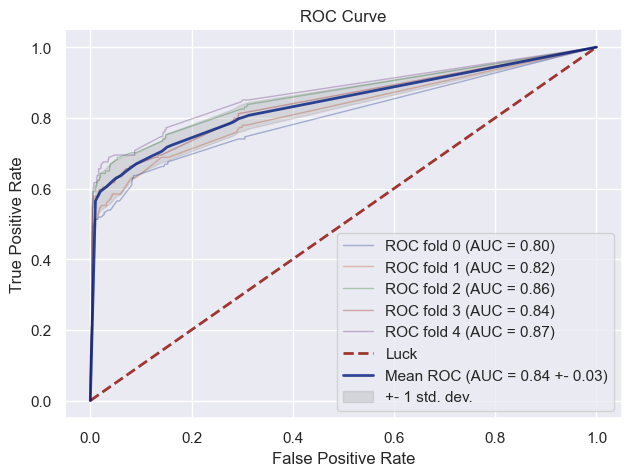

In [61]:
# Create a StratifiedKFold instance
cv = StratifiedKFold(n_splits=5)

# Creating a function to plot the graph
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # Defining some empty lists to store the results
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # Defining the counter
    i = 0
    
    # Loop for cross-validation
    for train, test in cv.split(X, y):
        # Executing the function and storing the probabilities of the results
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # Computing the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Plotting the ROC curve of the cross-validation individually
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
        i += 1
        
    # Plotting the diagonal line as a 50/50 rate reference
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Luck', alpha=0.8)
    
    # Calculating the means and standard deviation 
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting ROC curve with results mean
    plt.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f +- %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'+- 1 std. dev.')
    
    # Customizing the graph
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc='lower right')  # Correção aqui
    
    # Showing the graph
    plt.show()

# Executing the function and plotting the ROC AUC curve
draw_cv_roc_curve(best_est_rf, cv, X_train, y_train, title='ROC Curve')

## Final Model

After validating the model, I will use all the data from X and y from the training dataset for the final model with the best hyperparameters found during validation, defining the pipeline and training the model

## Model Training 

I will train the model with the best hyperparameters found, execute the pipeline with OverSampling and tuned Random Forest, and finally, the model will be trained

In [63]:
# Separating the data again
X_all = df_train.drop('pop_class', axis=1)
y_all = df_train.pop_class

# Instantiating the final model with the parameters found during cross-validation
final_model = rf_grid.best_estimator_

# Defining the pipeline for oversampling resampling and the final model
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# Training the model with the tuned parameters using all the data
model = pipeline.fit(X_all, y_all)

In [64]:
model.steps[1]

('randomforestclassifier',
 RandomForestClassifier(class_weight='balanced', max_features=6))

In [65]:
list = model.steps[1][1].feature_importances_

In [66]:
print(list.tolist())

[0.08705526894362467, 0.09035009767475781, 0.11088533472412823, 0.03535912257668137, 0.12206130682043756, 0.005938103017407465, 0.0826875047712885, 0.10164561023447624, 0.11303969111718518, 0.0805939204048743, 0.0895891819031629, 0.07615154435529664, 0.004643313456679194]


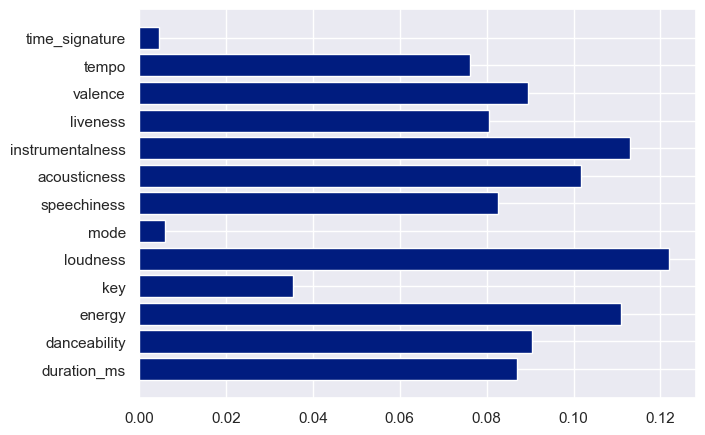

In [67]:
# Names list
names = df_quantitative_nm.columns

plt.barh(df_quantitative_nm.drop(columns=['pop_class']).columns.tolist(), list.tolist())

plt.show()

**Loudness** and **energy** have a high importance coefficient in the model. However, as we saw at the beginning, these two features are highly correlated. It might be worthwhile to revisit the data preprocessing step to eliminate the high correlation.

In [68]:
# SUGGESTION FOR REMOVING CORRELATION IN THE DATA PREPROCESSING STEP

"""Function that analyzes the correlation between the variables in the dataset, 
    creates a mask to remove mirrored data, and returns the data without the variables
    that have a correlation greater than the cutoff value of 0.95."""

def remove_corr_var(datas, cutoff_value=0.95):
    
    matriz_corr = datas.iloc[:, 4:-2].corr().abs()
    matriz_sup = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
    exclude = [column for column in matriz_sup.columns if any(matriz_sup[column]> cutoff_value)]
    
    return datas.drop(exclude, axis=1)

## Preparation, Prediction, and Evaluation on the Test Data

Here, we use the test dataset, which was split at the beginning, comprising 20% of the total data.

Furthermore, the data has been separated, and the input of new data was simulated to check if our model generalizes well. The expected result is slightly lower than what was validated. If the result is significantly below expectations, it will be necessary to readjust the model because it has resulted in overfitting.

In [69]:
# Separating the test data
X_test = df_test.drop('pop_class', axis=1)
y_test = df_test.pop_class

# Making predictions on the test data
y_pred_test = model.predict(X_test)

# Priting the results
print(f"accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"precision: {precision_score(y_test, y_pred_test)}")
print(f"recall:    {recall_score(y_test, y_pred_test)}")
print(f"f1:        {f1_score(y_test, y_pred_test)}")

accuracy:  0.9880228974020255
precision: 0.45179063360881544
recall:    0.6919831223628692
f1:        0.5466666666666666


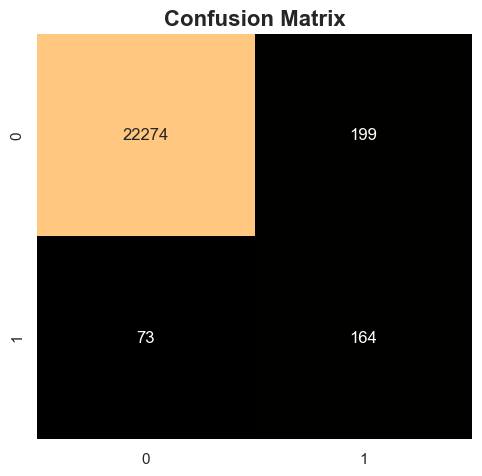

In [70]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

In [71]:
pd.DataFrame(index=['Baseline', 'Validation', 'Test'],
             data = {"accuracy": [accuracy_score(y_val, y_pred_base_val), np.mean(accuracy_lst_rf), accuracy_score(y_test, y_pred_test)],
                     "precision": [precision_score(y_val, y_pred_base_val), np.mean(precision_lst_rf), precision_score(y_test, y_pred_test)],
                     "recall": [recall_score(y_val, y_pred_base_val), np.mean(recall_lst_rf), recall_score(y_test, y_pred_test)],
                     "f1": [f1_score(y_val, y_pred_base_val), np.mean(f1_lst_rf), f1_score(y_test, y_pred_test)]})

,accuracy,precision,recall,f1
Baseline,0.989431,0.000000,0.000000,0.000000
Validation,0.987781,0.438107,0.541558,0.484043
Test,0.988023,0.451791,0.691983,0.546667


## Saving the Results

In [80]:
folder_name = "model_version1"
pkl_filename_model = os.path.join(folder_name, "RandomForestModel.pkl")

os.makedirs(folder_name, exist_ok=True)

try:
    with open(pkl_filename_model, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model successfully saved to: {pkl_filename_model}")
    
except Exception as e:
    print(f"An error occurred while saving the template: {e}")

Model successfully saved to: model_version1\RandomForestModel.pkl


In [74]:
# Storing the predictions in the test dataframe
df_test['Predicted'] = y_pred_test

# Comparing the actual values with the predicted values in the dataframe
df_test['Correct?'] = np.where(df_test['pop_class'] == df_test['Predicted'], 'Yes', 'No')

In [75]:
df_test.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_class,Predicted,Correct?
77407,0.038236,0.433503,0.703,0.818182,0.786564,1.0,0.050466,0.577309,0.000000,0.9350,0.703518,0.346959,0.8,0.0,0.0,Yes
96769,0.018514,0.661929,0.701,0.181818,0.764904,1.0,0.036062,0.534137,0.000002,0.6020,0.932663,0.649721,0.8,0.0,0.0,Yes
6993,0.032000,0.581726,0.976,0.090909,0.842110,0.0,0.185492,0.000046,0.022200,0.2720,0.316583,0.468501,0.8,0.0,0.0,Yes
75387,0.052745,0.285279,0.141,0.363636,0.562418,0.0,0.034611,0.981928,0.883000,0.1030,0.207035,0.556169,0.6,0.0,0.0,Yes
61284,0.053683,0.409137,0.921,0.818182,0.865194,1.0,0.113990,0.032731,0.000000,0.0985,0.576884,0.730667,0.8,0.0,0.0,Yes


In [76]:
df_test[df_test['pop_class'] == 1.0]

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_class,Predicted,Correct?
68854,0.053064,0.825381,0.560,0.181818,0.806966,0.0,0.064041,0.108434,0.000000,0.2680,0.288442,0.484990,0.8,1.0,0.0,No
20367,0.031304,0.612183,0.691,0.454545,0.808797,1.0,0.038549,0.024900,0.000000,0.5830,0.579899,0.604622,0.8,1.0,0.0,No
57412,0.043998,0.522843,0.430,0.636364,0.732405,1.0,0.038549,0.009739,0.000133,0.1290,0.104523,0.377381,0.8,1.0,1.0,Yes
2105,0.061420,0.601015,0.767,0.818182,0.864602,0.0,0.027979,0.002108,0.001650,0.1270,0.329648,0.396442,0.8,1.0,1.0,Yes
51000,0.032284,0.873096,0.541,0.090909,0.795757,0.0,0.033679,0.165663,0.163000,0.0663,0.956784,0.472462,0.8,1.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30562,0.030111,0.745178,0.874,0.727273,0.857759,1.0,0.068601,0.168675,0.000011,0.0489,0.909548,0.505206,0.8,1.0,0.0,No
53075,0.027328,0.857868,0.797,0.090909,0.823983,1.0,0.144041,0.058434,0.000006,0.1670,0.424121,0.501229,0.8,1.0,1.0,Yes
91610,0.041293,0.559391,0.913,0.000000,0.841019,0.0,0.048290,0.026406,0.000013,0.3470,0.546734,0.493039,0.8,1.0,1.0,Yes
88407,0.044969,0.659898,0.715,0.454545,0.820025,0.0,0.262176,0.099699,0.000291,0.1260,0.187940,0.438308,0.8,1.0,1.0,Yes
